<a href="https://colab.research.google.com/github/sunwoongc/aiffel_02_gn/blob/master/DS4C_Official_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the data from Kaggle

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sunnwoongchoi","key":"00037850b93dbb9f6c5993595ede0f49"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
# !kaggle competitions list

In [3]:
!kaggle datasets download -d kimjihoo/coronavirusdataset

  0% 0.00/7.00M [00:00<?, ?B/s]
100% 7.00M/7.00M [00:00<00:00, 64.6MB/s]


In [4]:
!ls

coronavirusdataset.zip	kaggle.json  sample_data


# Transcription of [[DS4C] What is this dataset (Detailed Description)](https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description)

# 1. The Lists of Data Table
### 1) Case Data
- **Case**: 국내 코로나(COVID-19) 감염사례

### 2) Patient Data
- **PatientInfo**: 국내 코로나 환자에 대한 전염병학적*(Epidemiological)* 데이터
- **PatientRoute**: 국내 코로나 환자의 이동경로 *(현재 이용불가)*

### 3) Time Series Data
- **Time**: 국내 코로나 상태에 관한 시계열 데이터
- **TimeAge**: 국내 코로나 상태에 관한 연령대별 시계열 데이터
- **TimeGender**: 국내 코로나 상태에 관한 성별별 시계열 데이터
- **TimeProvince**: 국내 코로나 상태에 관한 지역별 시계열 데이터

### 4) Additional Data
- **Region**: 대한민국의 지역별 위치 및 통계 데이터
- **Weather**: 대한민국 지역별 날씨 데이터
- **SearchTrend**: NAVER에서 검색된 키워드 트렌드 데이터
- **SeoulFloating**: 서울 유동인구 데이터(SK텔레콤 빅데이터 허브)
- **Policy**: 코로나에 대한 대한민국 정부 정책 데이터


## 2. The Structure of out Dataset
* 비슷한 특징을 가지는 것끼리 색으로 묶여있습니다.
* 컬럼간에 라인이 연결되있으면 컬럼이 일부 공유되고 있음을 의미합니다.
* 점선은 약한 상관관계가 있음을 의미합니다. (완전 공유는 아니지만 영향을 끼치는)

![db_0701](https://user-images.githubusercontent.com/50820635/86225695-8dca0580-bbc5-11ea-9e9b-b0ca33414d8a.PNG)

## The Detailed Description of each Data Table

캐글 커널에서와 달리 코랩에서 진행했기 때문에 다른 방법을 이용해 내용을 확인하고 데이터를 가져와보도록 하겠습니다.

In [16]:
my_zipfile = zipfile.ZipFile("coronavirusdataset.zip")
my_zipfile.namelist()

['Case.csv',
 'PatientInfo.csv',
 'Policy.csv',
 'Region.csv',
 'SearchTrend.csv',
 'SeoulFloating.csv',
 'Time.csv',
 'TimeAge.csv',
 'TimeGender.csv',
 'TimeProvince.csv',
 'Weather.csv']

In [18]:
# oppen zipped dataset
with zipfile.ZipFile("coronavirusdataset.zip") as z:
    
    with z.open("Case.csv") as f:
      case = pd.read_csv(f)
    
    with z.open("PatientInfo.csv") as f:
      p_info = pd.read_csv(f)

    with z.open("Policy.csv") as f:
      policy = pd.read_csv(f)    

    with z.open("Region.csv") as f:
      region = pd.read_csv(f)    

    with z.open("SearchTrend.csv") as f:
      search = pd.read_csv(f)   

    with z.open("SeoulFloating.csv") as f:
      floating = pd.read_csv(f)

    with z.open("Time.csv") as f:
      time = pd.read_csv(f) 

    with z.open("TimeAge.csv") as f:
      t_age = pd.read_csv(f) 

    with z.open("TimeGender.csv") as f:
      t_gender = pd.read_csv(f) 

    with z.open("TimeProvince.csv") as f:
      t_provin = pd.read_csv(f) 

    with z.open("Weather.csv") as f:
      weather = pd.read_csv(f)

In [44]:
## just for later use (for storing variable names)
data_list = ["case", "p_info", "policy", "region", 
             "search", "floating", "time", "t_age", 
             "t_gender", "t_provin", "weather"]

외국인들을 위해 우리나라의 행정구역을 설명한 부분은 생략했습니다.

### 1) Case
#### 국내 코로나(COVID-19) 감염사례
1. case_id: 감염사례에 대한 id
  > - case_id(7) = region_code(5) + case_number(2)  
  > - region_code는 'Region.csv'를 통해 확인 가능.

2. province: 특별시(Specical City) / 광역시(Metropolitan City) / 도(Province)

3. city: 시(City) / 군(Country) / 구(District)
  > - 'from other city'는 집단감염이 다른 도시에서 시작됐음을 의미합니다.

4. group: TRUE: 집단감염 / FALSE: 집단감염이 아님
  > - 값이 True인 경우 'infection_cases'의 값은 집단의 이름을 의미합니다  
  > - 값이 'contact with patient', 'overseas inflow' and 'etc' 는 집단 감염이 아닙니다.

5. infection_case: infection_case: 감염경로 (집단이름 혹은 기타 경로)
  > - The value 'overseas inflow' 는 해외유입을 의미합니다.

  > - The value 'etc' 에는 개별 사례, 조사 후 관련성 분류가 진행 중인 사례 및 조사 중인 사례가 포함됩니다.

6. confirmed: 누적된 확진자 수
7. latitude: 집단의 위도
8. longitude: 집단의 경도

In [19]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


### 2) PatientInfo
#### 국내 코로나 환자에 대한 전염병학적
1. patient_id: 환자번호
  > - patient_id(10) = region_code(5) + patient_number(5)
  > - region_code는 'Region.csv'를 통해 확인 가능.'
  > - patient_number는 두 가지 종류가 있습니다.  
      1) local_num: 지방정부에서 부여하는 번호
      2) global_num: 질병관리본부에서 부여하는 번호  
2. sex: 환자의 성별
3. age: 환자의 나이
  > - 0s: 0 ~ 9  
  > - 10s: 10 ~ 19  
  ...  
  > - 90s: 90 ~ 99  
  > - 100s: 100 ~ 109
- country: 환자의 국적
- province: 환자의 행정상 지역
- city: 환자의 행정상 도시
- infection_case: 감염사례
- infected_by: 환자를 감염시킨 사람의 ID
  > - 해당 컬럼은 'patient_id' 컬럼을 참조합니다. 
- contact_number: 접촉자 수 
- symptom_onset_date: 증상이 시작된 날짜
- confirmed_date: 확진 날짜
- released_date: 격리해제(퇴원)일
- deceased_date: 사망일
- state: 격리 / 격리해제 / 사망
  > - isolated: 병원에서 격리
  > - released: 병원에서 격리해제
  > - deceased: 사망

In [20]:
p_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


### 4) Time
#### 국내 코로나 상태에 관한 시계열 데이터
- date: YYYY-MM-DD
- time: Time (0 = AM 12:00 / 16 = PM 04:00)
  > - 3월 2일부터 KCDC의 정보 공개 시간이 PM 04:00에서 AM 12:00으로 변경되었습니다.
- test: 누적 검사 수
  > - 검사는 감염여부 진단검사 입니다.
- negative: 누적된 음성 인원 수
- confirmed: 누적된 양성 인원 수
- released: 누적된 격리해제 인원 수
- deceased: 누적된 사망 인원 수

In [22]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


### 5) TimeAge


In [23]:
t_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


### 6) TimeGender

In [24]:
t_gender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


### 7) TimeProvince

In [25]:
t_provin.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


### 8) Region
#### 대한민국의 지역별 위치 및 통계 데이터
- code: 지역번호
- province: 특별시(Specical City) / 광역시(Metropolitan City) / 도(Province)
- city: 시(City) / 군(Country) / 구(District)
- latitude: 방문지역 위도
- longitude: 방문지역 경도
- elementary_school_count: 초등학교 수
- kindergarten_count: 유치원 수
- university_count: 대학교 수
- academy_ratio: 학원의 비율
- elderly_population_ratio: 노인 인구 비율
- elderly_alone_ratio: 독거노인 가구 비율
- nursing_home_count: 요양원의 수

Source of the statistic: [KOSTAT (Statistics Korea)](http://kosis.kr/)

In [26]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


### 9) Weather
#### 대한민국 지역별 날씨 데이터
- code: 지역번호
- province: 특별시(Specical City) / 광역시(Metropolitan City) / 도(Province)
- date: YYYY-MM-DD
- avg_temp: 평균 기온
- min_temp: 최저 기온
- max_temp: 최고 기온
- precipitation: 일일 강수량
- max_wind_speed: 최고 풍속
- most_wind_direction: 최다 발생 풍향
- avg_relative_humidity: 평균 상대 습도

Source of the weather data: [KMA (Korea Meteorological Administration)](http://data.kma.go.kr)

In [27]:
weather.head()

,code,province,date,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
0,10000,Seoul,2016-01-01,1.2,-3.3,4.0,0.0,3.5,90.0,73.0
1,11000,Busan,2016-01-01,5.3,1.1,10.9,0.0,7.4,340.0,52.1
2,12000,Daegu,2016-01-01,1.7,-4.0,8.0,0.0,3.7,270.0,70.5
3,13000,Gwangju,2016-01-01,3.2,-1.5,8.1,0.0,2.7,230.0,73.1
4,14000,Incheon,2016-01-01,3.1,-0.4,5.7,0.0,5.3,180.0,83.9


### 10) SearchTrend
#### NAVER에서 검색된 키워드 트렌드 데이터
- date: YYYY-MM-DD

- cold: '감기'에 대한 검색량
  > - 단위는 기간의 가장 높은 검색 볼륨을 100으로 설정하여 상대 값을 의미합니다.

- flu: '독감'에 대한 검색량
  > - 단위는 위와 동일합니다.

- pneumonia: '폐렴'에 대한 검색량
  > - 단위는 위와 동일합니다.

- coronavirus: '코로나 바이러스'에 대한 검색량
  > - 단위는 위와 동일합니다.


Source of the data: [NAVER DataLab](https://datalab.naver.com/)

### 11) SeoulFloating
#### 서울 유동인구 데이터(SK텔레콤 빅데이터 허브)

- date: YYYY-MM-DD
- hour: 시간
- birth_year: 유동인구의 출생년도
- sex: 유동인구의 성별
- province: 특별시(Specical City) / 광역시(Metropolitan City) / 도(Province)
- city: 시(City) / 군(Country) / 구(District)
- fp_num: 유동 인구 수

Source of the data: [SKT Big Data Hub](https://www.bigdatahub.co.kr)

In [28]:
floating.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


### 12) Policy
#### 코로나에 대한 대한민국 정부 정책 데이터

- policy_id: 정책의 ID
- country: 해당 정책을 시행한 나라
- type: 정책의 종류
- gov_policy: 정부 방침
- detail: 정책의 세부사항
- start_date: 정책의 시작일
- end_date: 정책의 종료일

In [29]:
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


# Transcription of [[DS4C] EDA with Floating Population Data (Detailed Description)](https://www.kaggle.com/incastle/ds4c-eda-with-floating-population-data)

코로나 확진자가 방문한 가게는 문을 닫게 됩니다. 이로 인해 피해를 보는 소상공인이 많습니다. 따라서 이러한 현상이 얼마나 치명적인지 유동인구를 통해 파악해 보는 EDA 입니다.

커널에서 사용한 데이터와 현재 사용한 데이터의 차이가 있어서 세세한 부분은 다르게 진행하게 됐습니다.

In [30]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

import os

In [32]:
p_info.head()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


`fmt_month = mdates.MonthLocator(interval=1)`
`ax.xaxis.set_major_locator(fmt_month)`

와 같은 코드를 사용하기 위해 임시로 datetime 형태로 변형시켜줬습니다.

이러한 방법없이 사용하려면 

`ax.xaxis.set_major_locator(MultipleLocator(20))` 등을 사용할 수 있습니다.

In [83]:
floating['date']

0          2020-01-01
1          2020-01-01
2          2020-01-01
3          2020-01-01
4          2020-01-01
              ...    
1084795    2020-05-31
1084796    2020-05-31
1084797    2020-05-31
1084798    2020-05-31
1084799    2020-05-31
Name: date, Length: 1084800, dtype: object

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


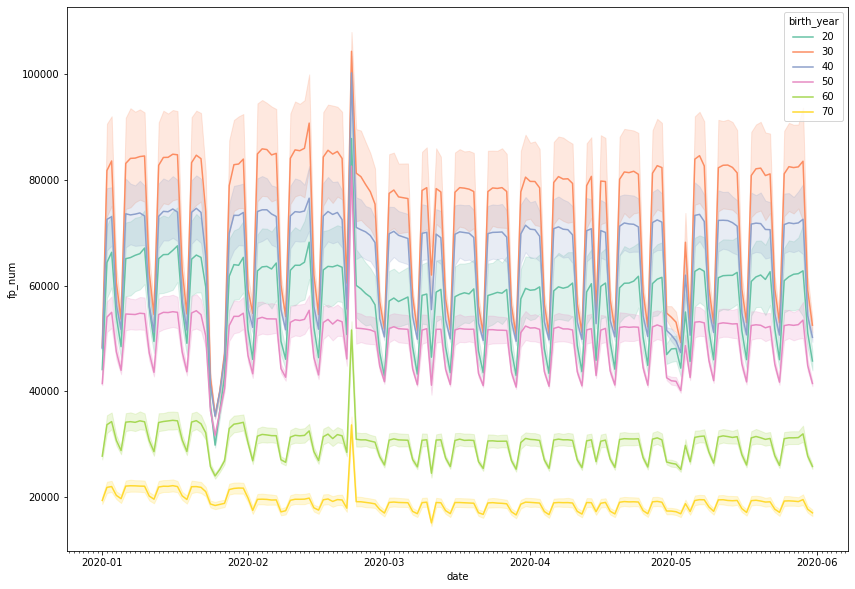

In [90]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

tmp = floating.loc[floating['city'] == 'Gangnam-gu']
tmp.loc[:, 'date'] = pd.to_datetime(tmp['date'])
## TODO: setting with copy error 수정 ##
fig, ax = plt.subplots(figsize=(14, 10))

palette = sns.color_palette("Set2", 6)
sns.lineplot(data=tmp, x='date', y='fp_num', hue='birth_year', palette=palette, ax=ax)


# Major ticks every month.
fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)

# Minor ticks every day.
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

# Text in the x axis will be displayed in 'YYYY-mm' format.
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# fig.canvas.draw()
# x_tick_labels = [t.get_text() for t in ax.get_xticklabels()]
# ax.set_xticklabels(x_tick_labels, rotation=90)

전반적으로 강남구는 항상 40대, 30대, 20대, 50대, 60대,70대 순으로 유동인구가 많으며, 1월말 부근에 유동인구가 갑자기 줄어드는 부분이 있는데 아마 설날(2020. 01. 24 ~ 2020. 01. 27)으로 보입니다. 2월 말 부근에 갑자기 늘어나는 부분에 대해서는 추가적으로 알아봐야 할 것 같습니다.

어떤 일정한 패턴을 계속해서 만들어 내는 것이 주중, 주말을 구분할 수 있지 않을까 생각이 듭니다.

추가적으로 이와 같은 분석을 다양한 지역구에 대해 시행할 수 있을 것 같습니다. 현재는 환자의 이동경로에 대한 데이터가 없으므로 공식 커널과 유사한 분석은 할 수가 없습니다.